In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy as np
import os
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
model_file = 'models/2017-02-22 23h09m19s.json'
model_weights = 'weights/2017-02-22 23h09m19s.h5'
data_file = 'weather_3000_crop_100.hdf5'

In [53]:
folder = '/Users/jeremielequeux/Documents/Git/deep_weather/'
# load json and create model
json_file = open(folder+model_file, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(folder+model_weights)
print("Loaded model from disk")

Loaded model from disk


In [54]:
dest = '/Users/jeremielequeux/Documents/Git/deep_weather/loaded_data/'+data_file
data = h5py.File(dest)
X_train = data['X_train'][...]
Y_train = data['Y_train'][...]
X_test = data['X_val'][...]
Y_test = data['Y_val'][...]

In [55]:
mean = np.mean(X_train)
std = 3*np.std(X_train)
X_test -= mean
X_test /= std
Y_test -= mean
Y_test /= std

In [56]:
predictions = loaded_model.predict(X_test, batch_size=10, verbose=1)

360/360 [==============================] - 15s    


In [57]:
Y_test_init = Y_test*std
Y_test_init += mean
predictions_init = predictions*std
predictions_init+= mean

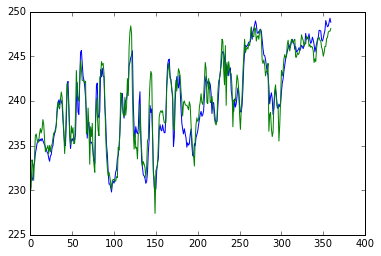

In [58]:
plt.plot(predictions_init)
plt.plot(Y_test_init)
plt.show()